## Importing the required libraries

In [111]:
#loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

## Loading dataset

In [112]:
#loading the dataset
df=pd.read_csv("E:\Python\Data_Sets\Zomato\Banglore data\Banglore data.csv")

In [113]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Summary of the dataset

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [115]:
print(df.shape)

(51717, 17)


In [116]:
print(df.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


## Data Cleaning
#### 1) Dropping unnecessary columns
#### 2) Renaming columns
#### 3) Dropping duplicates 
#### 3) Cleaning columns individually

#### 1) Dropping unnecessary columns

In [117]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [118]:
print(df.columns.values)

['name' 'online_order' 'book_table' 'rate' 'votes' 'rest_type' 'cuisines'
 'approx_cost(for two people)' 'listed_in(type)' 'listed_in(city)']


#### 2) Renaming columns

In [119]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})

In [120]:
print(df.columns.values)

['Name' 'Takes online orders?' 'Has table booking?' 'Ratings' 'Votes'
 'Rest_Type' 'Cuisines' 'Cost' 'Type' 'City']


In [121]:
df.sample(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
15148,Sunny Side Bistro,Yes,No,3.8/5,362,Cafe,"Cafe, Continental",700,Delivery,Frazer Town
2518,The Airos,Yes,No,4.1/5,130,Cafe,"Cafe, Italian, Pizza",650,Cafes,Basavanagudi
26536,Dialogues,No,No,4.1/5,314,Cafe,"Cafe, Continental",600,Cafes,Koramangala 4th Block
49171,Chili's American Grill & Bar,Yes,Yes,4.6 /5,1534,"Casual Dining, Bar","American, Tex-Mex, Burger, BBQ","1,800",Delivery,Sarjapur Road
9109,Tibetan Mother's Kitchen,Yes,No,4.0/5,957,Casual Dining,"Tibetan, Chinese, Momos",500,Delivery,BTM


#### Checking for duplicates in the data

In [122]:
sum(df.duplicated())

124

#### 3) dropping duplicates

In [123]:
df=df.drop_duplicates()
print(df.shape)

(51593, 10)


In [124]:
print(len(df['Name'].unique()))
## there are 8792 unique restaurants in the dataset

8792


#### 4) Cleaning columns individually

In [125]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)

df['Name'] = df['Name'].apply(lambda x: name_clean(x))
print(df['Name'])

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object


In [126]:
## cleaning the Ratings Column
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
## Here we see that there are 'NEW', 'nan', '-', 'NaN' values which indicate null values
## and hence we replace them.

In [127]:
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

In [128]:
print(df['Ratings'])

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: Ratings, Length: 51593, dtype: object


In [ ]:
## the ratings are in the form of string like '3.5/5'. We remove the '/5' part
## and convert the ratings out of 5 into a integer.

In [129]:
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value

In [130]:
df['Ratings']=df['Ratings'].apply(remove_5)

In [131]:
print(df['Ratings'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' nan '2.9' '3.5' '2.6' '3.8 ' '3.4' '4.5' '2.5' '2.7'
 '4.7' '2.4' '2.2' '2.3' '3.4 ' '3.6 ' '4.8' '3.9 ' '4.2 ' '4.0 ' '4.1 '
 '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 ' '3.2 ' '2.6 '
 '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 ' '3.0 ' '4.8 '
 '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']


In [132]:
## converting to float type data
df['Ratings']=df['Ratings'].astype(float)
print(df['Ratings'].dtypes)

float64


In [133]:
df['Ratings'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [134]:
df['Ratings'].value_counts()

3.9    3967
3.8    3870
3.7    3814
3.6    3311
4.0    3180
4.1    2942
3.5    2781
3.4    2472
3.3    2305
4.2    2179
3.2    1867
4.3    1686
3.1    1561
4.4    1137
3.0    1022
2.9     801
4.5     653
2.8     600
2.7     307
4.6     299
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: Ratings, dtype: int64

In [135]:
## cleaning the 'cost' column
df['Cost'].values

array(['800', '800', '800', ..., '2,000', '2,500', '1,500'], dtype=object)

In [136]:
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
    
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())
print(df['Cost'].dtypes)

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64
float64


In [137]:
print(df['Votes'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: Votes, Length: 51593, dtype: int64>


## Exploratory Data Analysis

#### Checking for any null values in the dataset

In [76]:
print(df.isnull().sum())

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64


In [77]:
print([features for features in df.columns if df[features].isnull().sum()>0])

['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<AxesSubplot:>

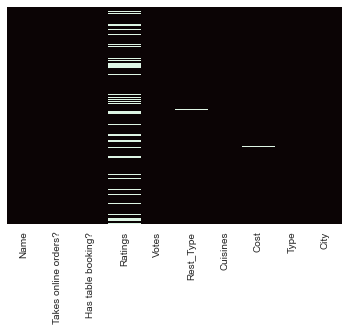

In [78]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

#### We see that the columns 'Ratings', 'Rest_Type', 'Cuisines' and 'Cost' have null values and hence we drop the rows that contain these null values.

In [138]:
##df['Ratings']=df['Ratings'].fillna(0)

In [139]:
df=df.dropna()
print(df.shape)

(41190, 10)


In [140]:
df.isnull().sum()

Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64

### Percentage of restaurants in Banglore that accept online orders

Yes    27046
No     14144
Name: Takes online orders?, dtype: int64


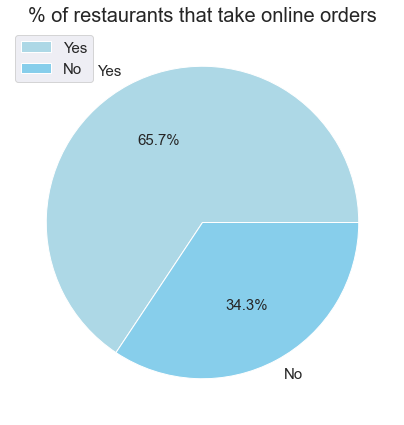

In [141]:
print(df['Takes online orders?'].value_counts())

plt.figure(figsize=(7,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

#### It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available.

### Percentage of restaurants in Banglore that provide table booking facility

No     34915
Yes     6275
Name: Has table booking?, dtype: int64


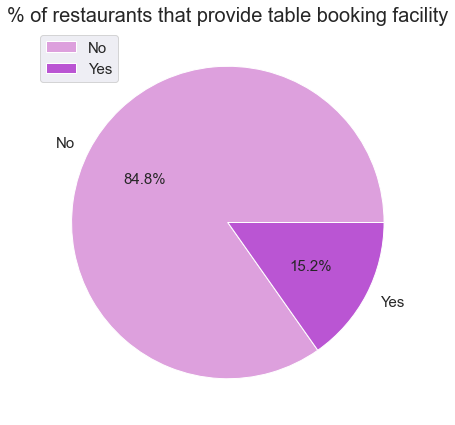

In [142]:
print(df['Has table booking?'].value_counts())

plt.figure(figsize=(7,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

#### The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.

### What was the most common rating?

In [143]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
print(ratings)

    Ratings  Rating_Count
0       1.8             5
1       2.0            11
2       2.1            24
3       2.2            26
4       2.3            51
5       2.4            66
6       2.5           100
7       2.6           249
8       2.7           303
9       2.8           580
10      2.9           800
11      3.0           990
12      3.1          1550
13      3.2          1839
14      3.3          2272
15      3.4          2443
16      3.5          2761
17      3.6          3282
18      3.7          3801
19      3.8          3816
20      3.9          3953
21      4.0          3142
22      4.1          2922
23      4.2          2151
24      4.3          1677
25      4.4          1136
26      4.5           653
27      4.6           299
28      4.7           167
29      4.8            66
30      4.9            55


Text(0, 0.5, 'Ratings Count')

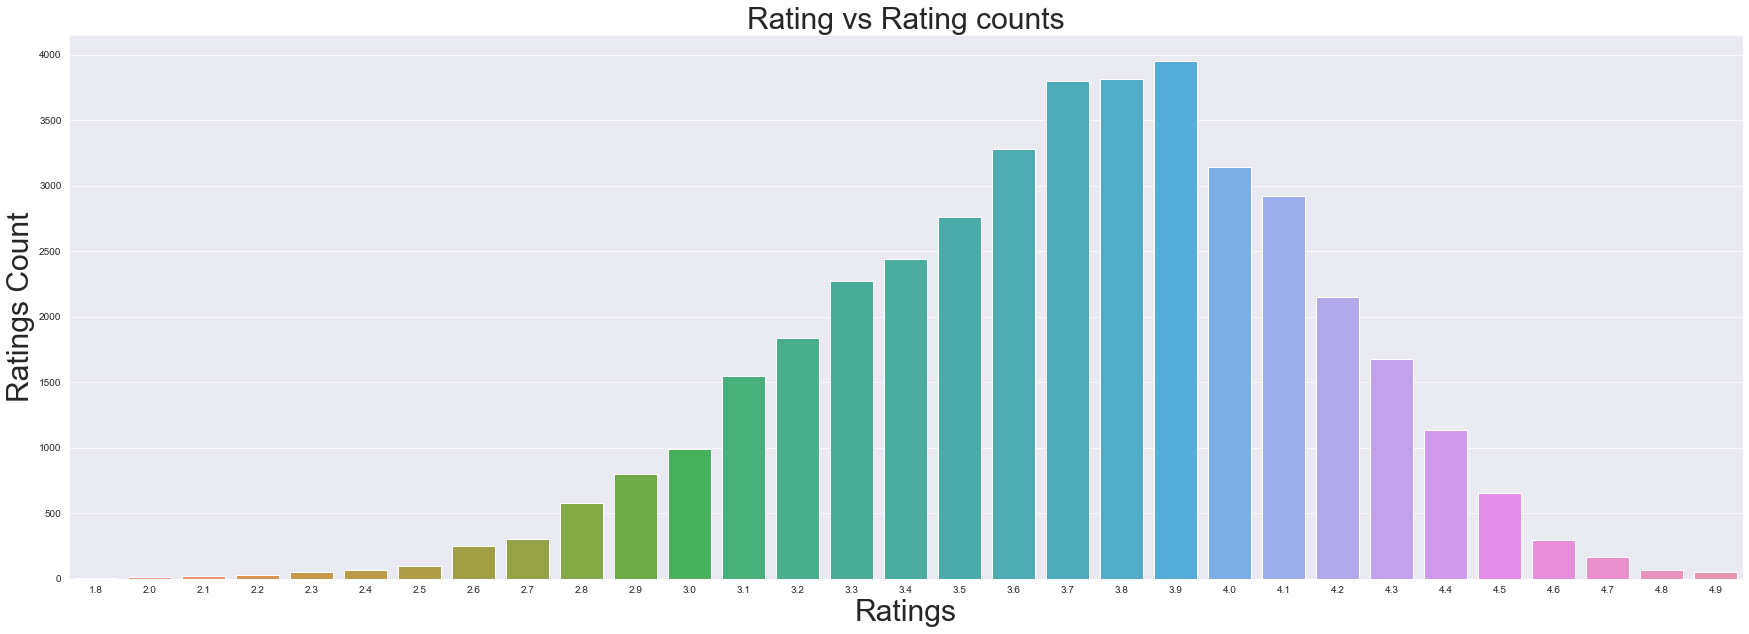

In [144]:
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

#### Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

### Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?

C:\Users\admin\AppData\Local\Temp/ipykernel_2412/3645467860.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 2160x720 with 0 Axes>

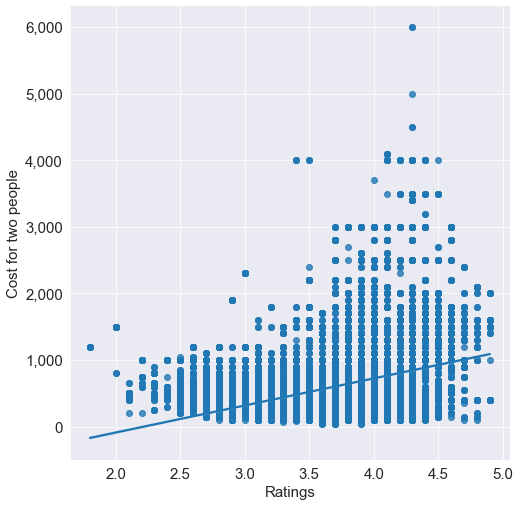

In [145]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


#### As we can see, restaurants that cost less have better reviews than restaurants that are expensive.

### Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.

In [170]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


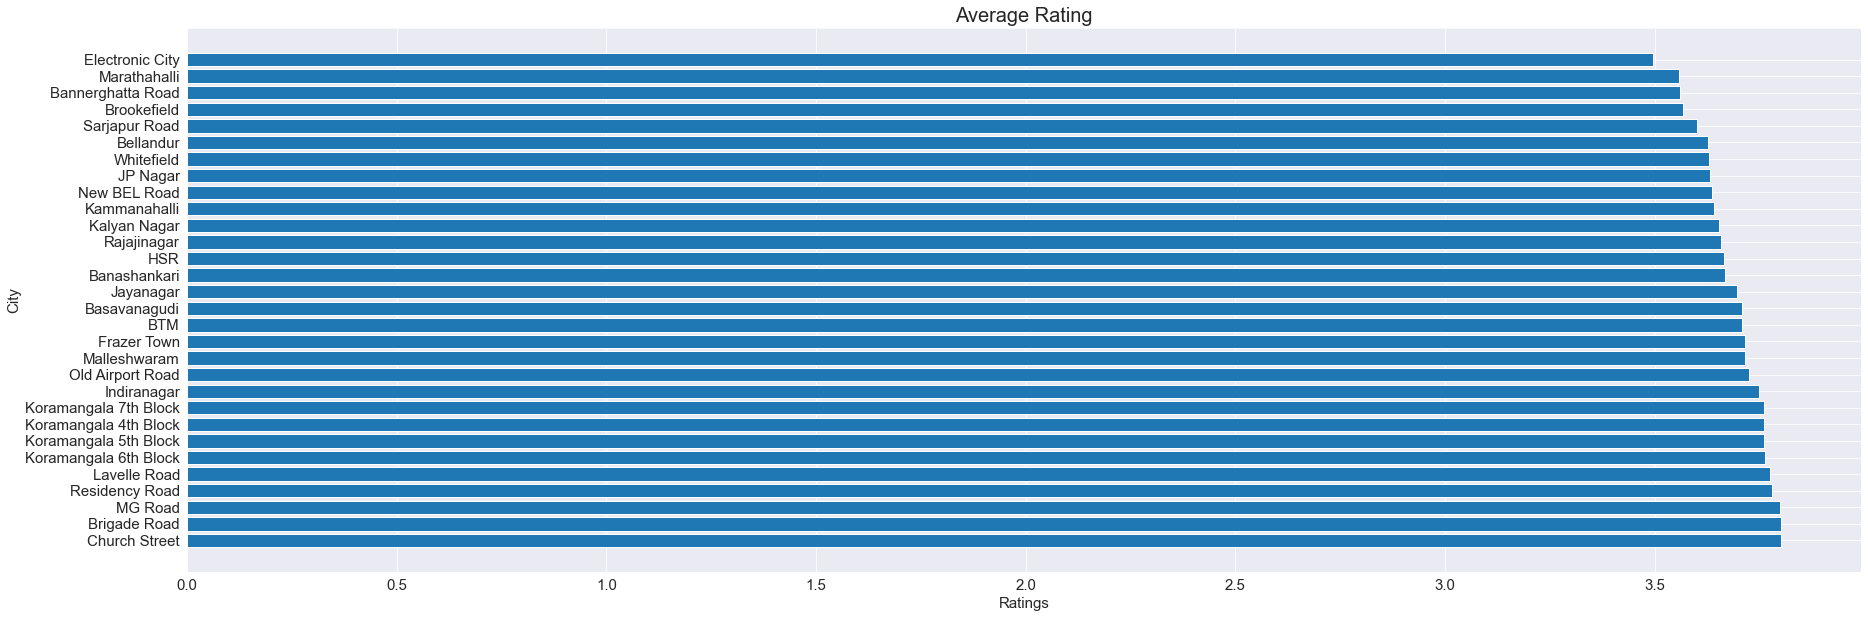

In [171]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

#### High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.

### Which cuisine do customers like the most?

In [172]:
df['Cuisines'].value_counts()

North Indian                                2107
North Indian, Chinese                       1949
South Indian                                1231
Cafe                                         620
Bakery, Desserts                             613
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

In [173]:
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

                                               Cuisines  Ratings
1001  Continental, North Indian, Italian, South Indi...      4.9
1274                 Healthy Food, Salad, Mediterranean      4.9
172                         Asian, Chinese, Thai, Momos      4.9
989   Continental, North Indian, Chinese, European, ...      4.8
192             Asian, Mediterranean, North Indian, BBQ      4.8


#### Using searching for the above facts, it may be interpreted that Continental, North Indian, and Italian meals are popular among the restaurant customers in Bangalore.

### Ratings vs Votes vs Cost

In [150]:
max(df['Votes'].unique())

16832

<AxesSubplot:>

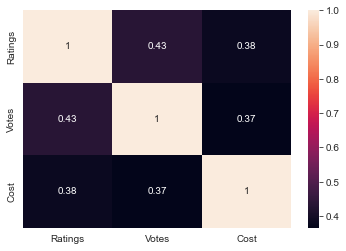

In [151]:
sns.heatmap(df.corr(),annot=True)

In [152]:
c=df.groupby('Votes')['Ratings'].mean().reset_index().sort_values(by='Votes',ascending=False)
print(c.head(5))

      Votes  Ratings
2322  16832      4.9
2321  16345      4.9
2320  14956      4.7
2319  14726      4.7
2318  14723      4.7


#### Most famous restaurant type in Bangalore

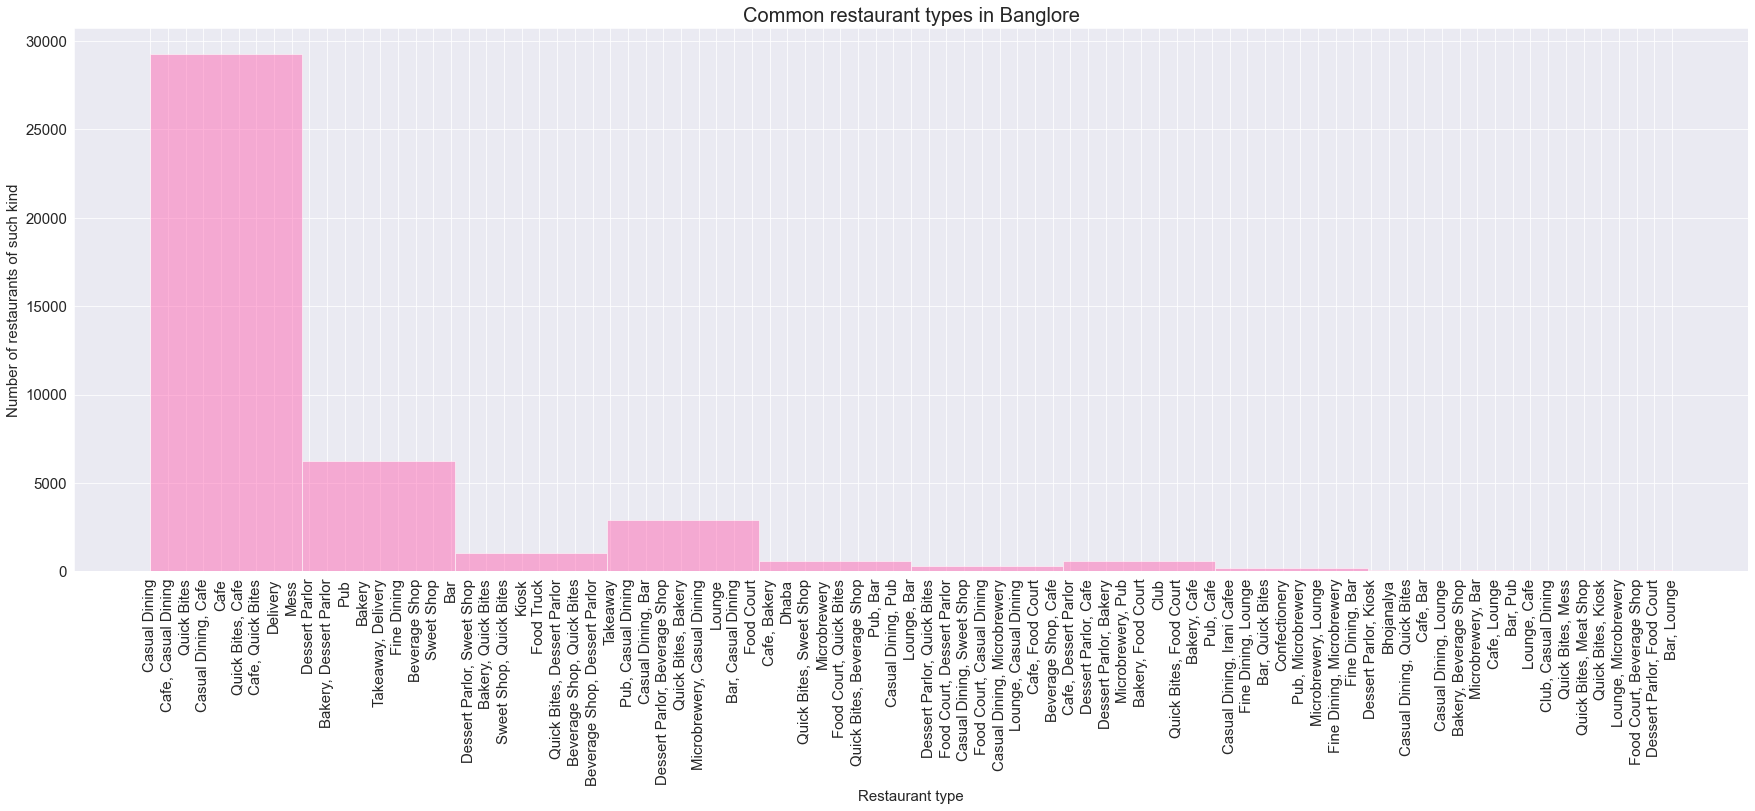

In [153]:
plt.figure(figsize=(30,10))
plt.hist(df['Rest_Type'],alpha=0.5,color='hotpink')
plt.xlabel('Restaurant type',size=15)
plt.ylabel('Number of restaurants of such kind',size=15)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.title('Common restaurant types in Banglore',size=20)
plt.show()

### What is the average price for two people based on the type of service?

In [154]:
df['Type'].value_counts()

Delivery              20406
Dine-out              14050
Desserts               2709
Cafes                  1511
Drinks & nightlife     1038
Buffet                  846
Pubs and bars           630
Name: Type, dtype: int64

In [155]:
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)

                 Type         Cost
3            Desserts   409.114064
2            Delivery   495.254631
1               Cafes   646.426208
4            Dine-out   655.081851
0              Buffet  1316.548463
6       Pubs and bars  1336.031746
5  Drinks & nightlife  1454.190751


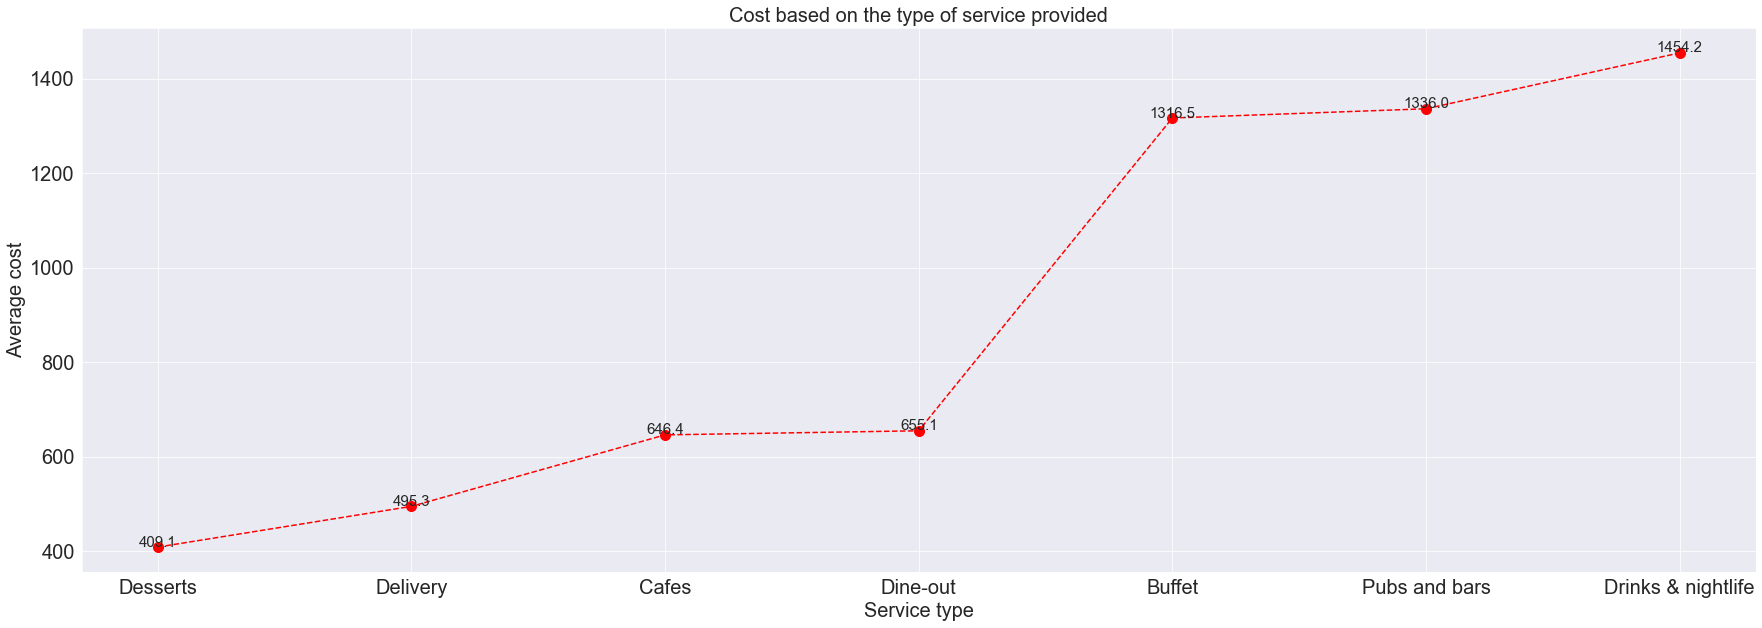

In [174]:
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

#### According to the line graph above, while desserts were the least expensive type of food, restaurants that served buffets and drinks cost more than Rs.1300 for two people.

### Which city has the higheste earning restaurants and what is the max and min earnings in that city?

In [157]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [158]:
e=df.groupby('City')['Cost'].agg(['mean','max','min']).sort_values(by='mean',ascending=False).reset_index()
print(e)

                     City        mean     max    min
0           Church Street  849.632107  4000.0   40.0
1            Brigade Road  838.697706  4000.0   40.0
2            Lavelle Road  830.648033  4100.0   50.0
3                 MG Road  828.999337  4000.0   50.0
4          Residency Road  818.979911  4000.0   50.0
5             Indiranagar  703.938802  6000.0   40.0
6        Old Airport Road  653.620837  6000.0  100.0
7              Whitefield  651.207327  3000.0  150.0
8            Malleshwaram  618.361522  5000.0  100.0
9             Frazer Town  610.304302  3000.0   40.0
10              Bellandur  593.161765  2500.0  100.0
11          Sarjapur Road  580.344149  2500.0  100.0
12            Brookefield  568.261633  3000.0  100.0
13  Koramangala 4th Block  565.392810  3000.0   40.0
14        Electronic City  564.119804  3000.0  100.0
15  Koramangala 5th Block  563.907432  2500.0   40.0
16  Koramangala 7th Block  559.847458  2500.0  100.0
17  Koramangala 6th Block  559.056604  2500.0 

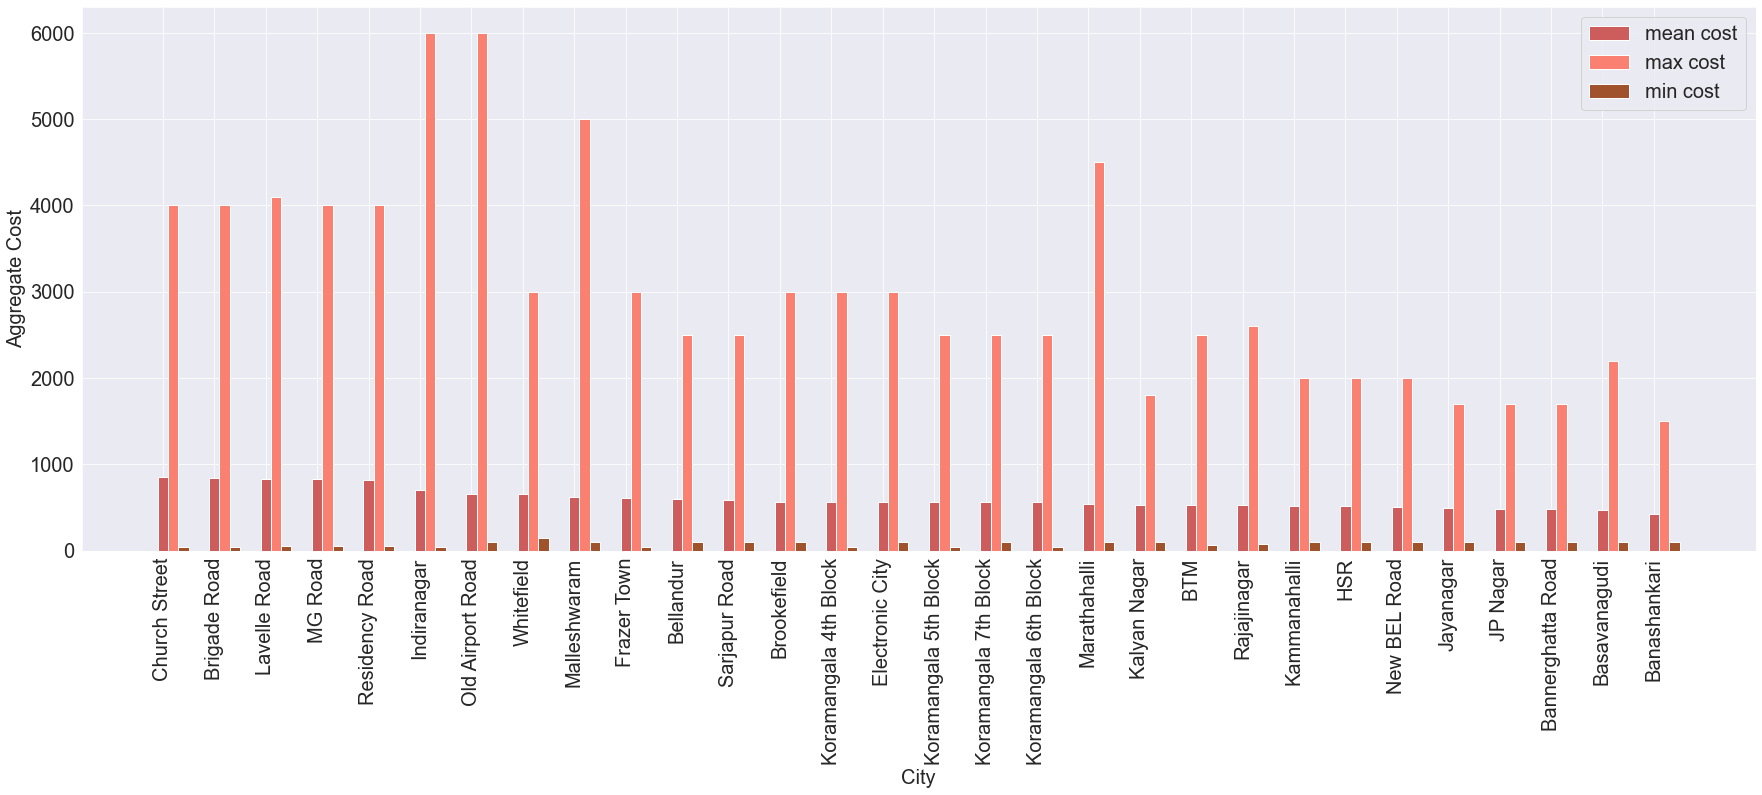

In [159]:
e=df.groupby('City')['Cost'].agg(['mean','max','min']).sort_values(by='mean',ascending=False).reset_index()
print(e)
plt.figure(figsize=(30,10))
n=30
i= np.arange(n) 
width=0.2
e1=plt.bar(i, e['mean'], width, color = 'indianred')  
e2=plt.bar(i+width, e['max'], width, color='salmon')
e3=plt.bar(i+width*2, e['min'], width, color = 'sienna')
plt.xlabel('City',size=20)
plt.ylabel('Aggregate Cost',size=20)
plt.xticks(e.index,e.City,rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.legend((e1,e2,e3), ('mean cost','max cost','min cost'),fontsize=20)

#### Restaurant type with highest rating

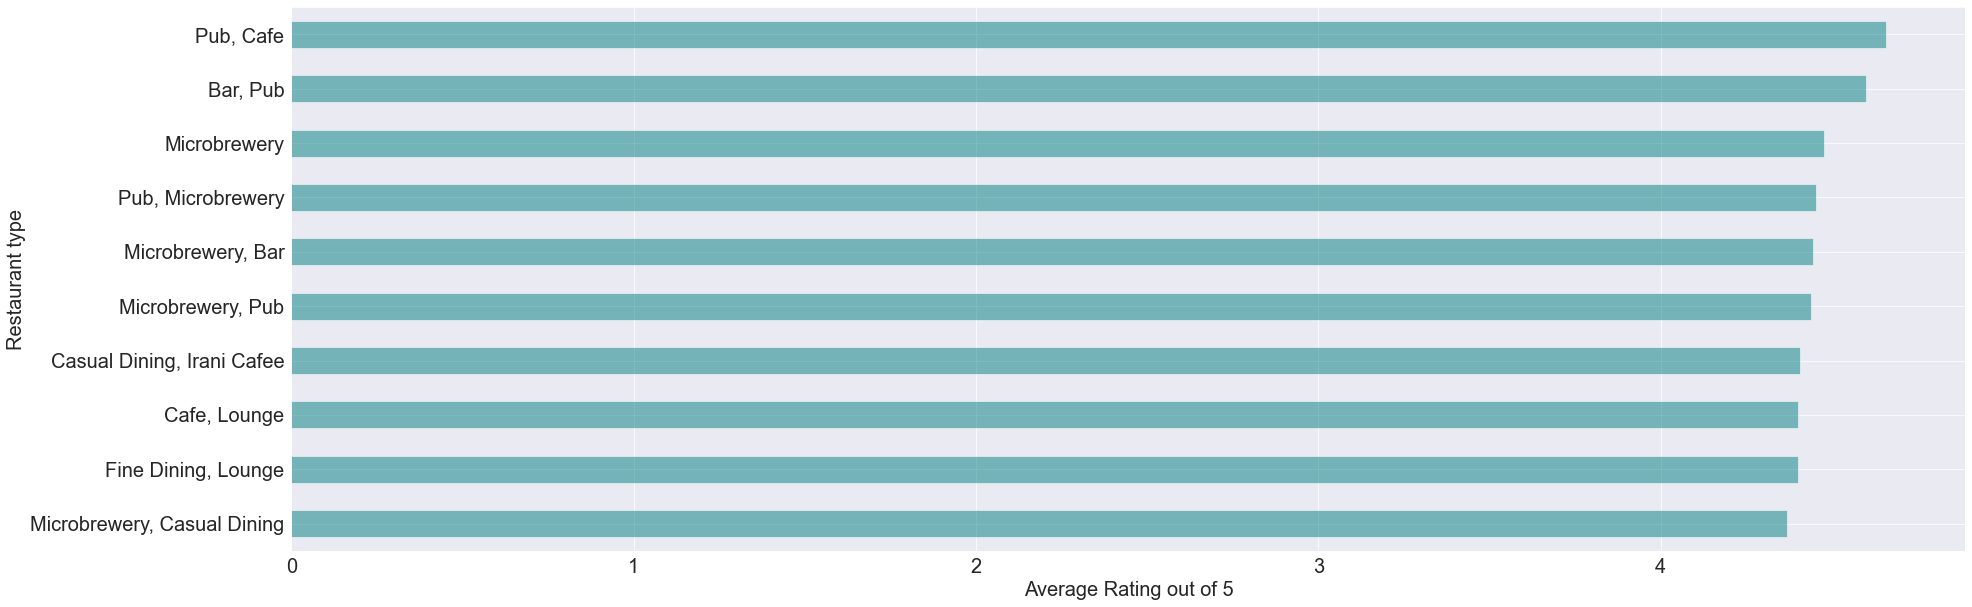

In [160]:
i=df.groupby('Rest_Type')['Ratings'].mean().sort_values(ascending=False)[0:10][::-1]
i.plot(kind='barh',alpha=0.5,figsize=(30,10),color='teal')
plt.ylabel('Restaurant type',size=20)
plt.xlabel('Average Rating out of 5',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### Does the restaurant’s rating depend on whether it accepts online orders or not?

In [161]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()

In [162]:
print(grp1)

  Takes online orders?   Ratings
0                   No  3.659538
1                  Yes  3.723796


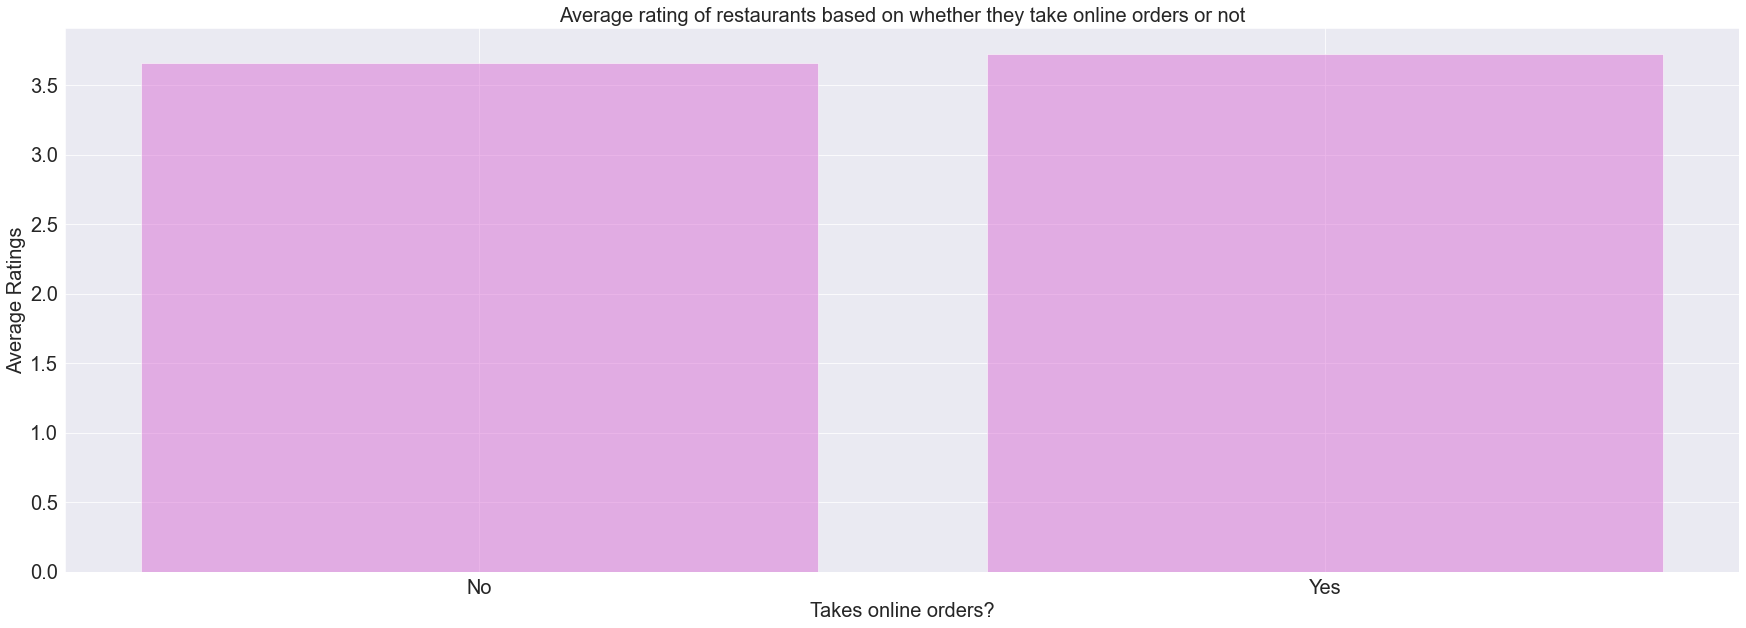

In [163]:
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

#### Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

#### Top 10 rated restaurants

In [164]:
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

                                Name   Ratings
943      Byg Brewski Brewing Company  4.900000
420   Asia Kitchen By Mainland China  4.900000
4886                Sant Spa Cuisine  4.900000
4445                    Punjab Grill  4.871429
624           Belgian Waffle Factory  4.844828
5979                The Pizza Bakery  4.800000
1977                        Flechazo  4.800000
4102                 OG Variar  Sons  4.800000
88           ABs  Absolute Barbecues  4.789474
703                       Biergarten  4.766667


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


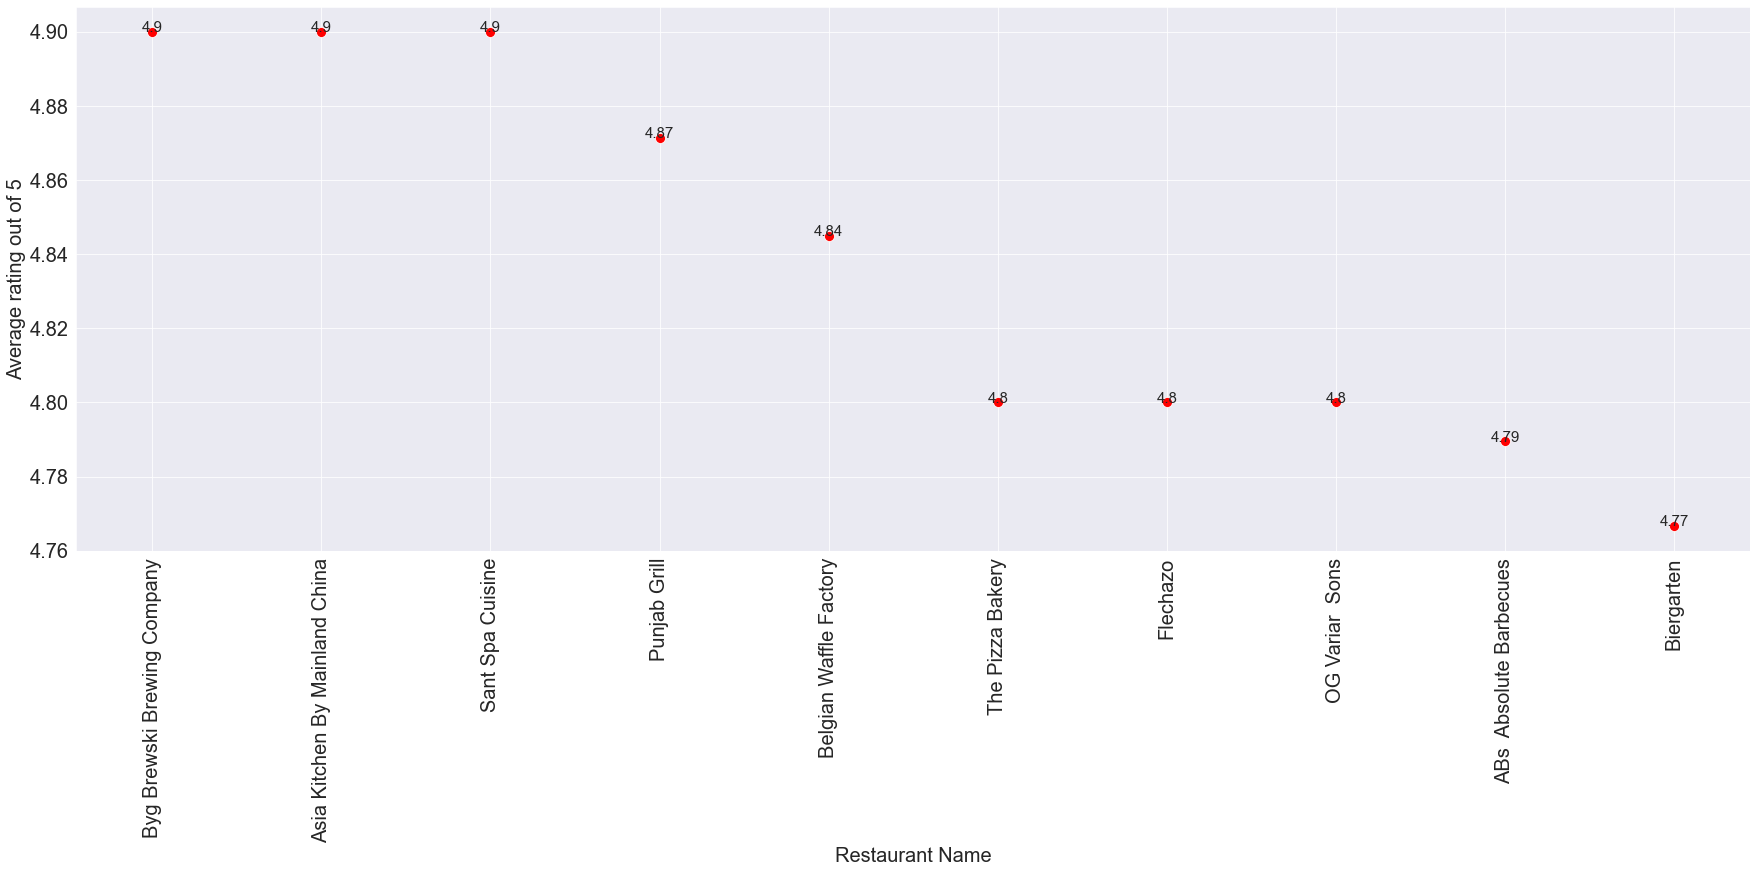

In [165]:
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
plt.figure(figsize=(30,10))
sns.scatterplot(grp2.Name,grp2.Ratings,s=100,color='red')
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')

plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()